In [ ]:
pip install pandas #하도 유명해서 이미 설치되어 있다
import numpy as np
from pandas import Series # Series만 불러왔음

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# series 객체 만들기
fruit = Series([2500,3800,1200,600], index=['apple','banana','peer','cherry']) # 시리즈 객체 만들기. 데이터와 인덱스 지정

In [ ]:
fruit
# fruit 한 번 찍어보기. print 없이 이렇게 한 번 찍어보는 건 주피터노트북에서만 제공하는 기능
# print 구문 안 쓰면 .py 파일로 실행했을 시 오류남

apple     2500
banana    3800
peer      1200
cherry     600
dtype: int64

In [ ]:
# 값과 인덱스를 추출해보자
print(fruit.values)
print(fruit.index)

[2500 3800 1200  600]
Index(['apple', 'banana', 'peer', 'cherry'], dtype='object')


In [ ]:
# Dict 타입으로 표현
fruitData = {'apple':2500,'banana':3800,'peer':1200,'cherry':600}
fruit = Series(fruitData) # fruitData를 series 객체로 만들어서 저장

In [ ]:
#print(type(fruitData))
#print(type(fruit))

In [ ]:
fruit

apple     2500
banana    3800
peer      1200
cherry     600
dtype: int64

In [ ]:
# Series 객체의 이름과 column 이름 설정해보자
fruit.name = 'fruitPrice'
fruit.index.name = 'fruitName'

In [ ]:
fruit # 객체 자체의 이름은 fruitPrice가 된 것이고, column 이름이 fruitName이 된 것것

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [ ]:
# DataFrame 객체
fruitData = {'fruitName':['apple','banana','peer','cherry'],
             'fruitPrice':[2500,3800,1200,6000],
             'num':[10,5,3,8]
             } # 여기까지 만든 건 일단 딕셔너리

In [ ]:
from pandas import DataFrame
fruitFrame = DataFrame(fruitData)

In [ ]:
fruitFrame

,fruitName,fruitPrice,num
0,apple,2500,10
1,banana,3800,5
2,peer,1200,3
3,cherry,6000,8


In [ ]:
# column 순서 지정하기
fruitFrame = DataFrame(fruitData, columns=['fruitPrice','num','fruitName'])
fruitFrame

,fruitPrice,num,fruitName
0,2500,10,apple
1,3800,5,banana
2,1200,3,peer
3,6000,8,cherry


In [ ]:
# 특정 항목 추출하기
fruitFrame['fruitName']

0     apple
1    banana
2      peer
3    cherry
Name: fruitName, dtype: object

In [ ]:
fruitFrame.fruitName # 객체지향적 관점으로 보면 이와 같이 표현 가능. 접근법의 차이

0     apple
1    banana
2      peer
3    cherry
Name: fruitName, dtype: object

In [ ]:
# column 추가하기
fruitFrame['Year'] = '2022'

In [ ]:
fruitFrame

,fruitPrice,num,fruitName,Year
0,2500,10,apple,2022
1,3800,5,banana,2022
2,1200,3,peer,2022
3,6000,8,cherry,2022


In [ ]:
# Series 객체를 추가해보자
variable = Series([4,2,1], index=[0,2,3]) # index가 지정되지 않은 1은 NaN으로 표기(null값. 0은 아님)

fruitFrame['Stock'] = variable

fruitFrame

,fruitPrice,num,fruitName,Year,Stock
0,2500,10,apple,2022,4.0
1,3800,5,banana,2022,NaN
2,1200,3,peer,2022,2.0
3,6000,8,cherry,2022,1.0


In [ ]:
# 자료구조 다뤄보기
# 데이터 구조의 항목을 삭제해보자
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [ ]:
new_fruit = fruit.drop('banana') # pandas에서 뭔가 삭제하는 명령어는 drop 사용. 원본은 그대로 남음. 그냥 fruit 출력하면 banana 살아있는 원본 출력됨
new_fruit

# fruit = fruit.drop('banana') # 이렇게 작성해야 덮어씌우는 형태로 banana가 없어진 fruit가 출력됨

fruitName
apple     2500
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [ ]:
# index를 숫자가 아닌 특정한 값으로 바꿔보기
fruitData

{'fruitName': ['apple', 'banana', 'peer', 'cherry'],
 'fruitPrice': [2500, 3800, 1200, 6000],
 'num': [10, 5, 3, 8]}

In [ ]:
# 과일 이름을 index로 써보자
fruitName = fruitData['fruitName']
fruitName

['apple', 'banana', 'peer', 'cherry']

In [ ]:
fruitFrame = DataFrame(fruitData, index=fruitName, columns=['fruitPrice','num'])
fruitFrame

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,3
cherry,6000,8


In [ ]:
newFruitFrame = fruitFrame.drop(['apple','cherry'])
newFruitFrame

,fruitPrice,num
banana,3800,5
peer,1200,3


In [ ]:
newFruitFrame = fruitFrame.drop(['num'], axis=1)
newFruitFrame

,fruitPrice
apple,2500
banana,3800
peer,1200
cherry,6000


In [ ]:
# Pandas Slice를 사용하는 방법
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [ ]:
fruit[:] # 전체데이터 가져와라
fruit['apple':'peer'] # apple에서 peer까지 가져와라
fruit[:'peer'] # 처음부터 peer까지 가져와라

fruitName
apple     2500
banana    3800
peer      1200
Name: fruitPrice, dtype: int64

In [ ]:
# Series 객체의 기본 연산
fruit1 = Series([5,9,10,3],index=['apple','banana','cherry','peer'])
fruit2 = Series([3,2,9,5,10],index=['apple','orange','banana','cherry','mango'])

In [ ]:
newFruit = fruit1 + fruit2
print(newFruit) # 없는 쪽의 값이 null로 처리됨. 계산이 안 됨. 0으로 나오지 않음

apple      8.0
banana    18.0
cherry    15.0
mango      NaN
orange     NaN
peer       NaN
dtype: float64


In [ ]:
# DataFrame 객체의 기본 연산
fruitData1 = {'Ohio':[4,8,3,5],'Texas':[0,1,2,3]}
fruitData2 = {'Ohio':[3,0,2,1,7],'Colorado':[5,4,3,6,0]} # 여기까지 일단 딕셔너리 타입
fruitFrame1 = DataFrame(fruitData1,
                        columns=['Ohio','Texas'], 
                        index=['apple','banana','cherry','peer'])
fruitFrame2 = DataFrame(fruitData2,
                        columns=['Ohio','Colorado'],
                        index=['apple','orange','banana','cherry','mango'])

In [ ]:
fruitFrame1

,Ohio,Texas
apple,4,0
banana,8,1
cherry,3,2
peer,5,3


In [ ]:
fruitFrame2

,Ohio,Colorado
apple,3,5
orange,0,4
banana,2,3
cherry,1,6
mango,7,0


In [ ]:
newFruitFrame = fruitFrame1 + fruitFrame2
newFruitFrame

,Colorado,Ohio,Texas
apple,NaN,7.0,NaN
banana,NaN,10.0,NaN
cherry,NaN,4.0,NaN
mango,NaN,NaN,NaN
orange,NaN,NaN,NaN
peer,NaN,NaN,NaN


In [ ]:
# 데이터의 정렬

# Series의 정렬
fruit

fruitName
apple     2500
banana    3800
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [ ]:
fruit.sort_values()
# 값(value)을 기준으로 정렬
# fruit.sort_values(ascending=True) 순서 정렬
# fruit.sort_values(ascending=False) 역순 정렬

fruitName
cherry     600
peer      1200
apple     2500
banana    3800
Name: fruitPrice, dtype: int64

In [ ]:
fruit.sort_values(ascending=False)

fruitName
banana    3800
apple     2500
peer      1200
cherry     600
Name: fruitPrice, dtype: int64

In [ ]:
# DataFrame의 정렬
fruitName = fruitData['fruitName']

In [ ]:
fruitFrame = DataFrame(fruitData, index=fruitName, columns=['num','fruitPrice'])
fruitFrame

,num,fruitPrice
apple,10,2500
banana,5,3800
peer,3,1200
cherry,8,6000


In [ ]:
fruitFrame.sort_index()

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,8,6000
peer,3,1200


In [ ]:
fruitFrame.sort_index(ascending=False)

,num,fruitPrice
peer,3,1200
cherry,8,6000
banana,5,3800
apple,10,2500


In [ ]:
fruitFrame.sort_index(axis=1) # axis 도입으로 column 정렬

,fruitPrice,num
apple,2500,10
banana,3800,5
peer,1200,3
cherry,6000,8


In [ ]:
fruitFrame.sort_values(by=['fruitPrice', 'num']) # 다단계로 정렬

,num,fruitPrice
peer,3,1200
apple,10,2500
banana,5,3800
cherry,8,6000


In [ ]:
# Pandas를 이용한 기초 분석
import pandas as pd

In [ ]:
german = pd.read_csv('http://freakonometrics.free.fr/german_credit.csv')

In [ ]:
#type(german)

In [ ]:
german.columns.values

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [ ]:
german_sample = german[['Creditability','Duration of Credit (month)','Purpose','Credit Amount']]

In [ ]:
german_sample

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171
...,...,...,...,...
995,0,24,3,1987
996,0,24,0,2303
997,0,21,0,12680
998,0,12,3,6468


In [ ]:
german_sample.min() # 각 항목별 최솟값 보여줘

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64

In [ ]:
german_sample.max() # 각 항목별 최댓값 보여줘

Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64

In [ ]:
german_sample.mean() # 각 항목별 평균값 보여줘

Creditability                    0.700
Duration of Credit (month)      20.903
Purpose                          2.828
Credit Amount                 3271.248
dtype: float64

In [ ]:
german_sample.head() # 앞부분 데이터 5개 맛보기로 보여줌

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171


In [ ]:
german_sample.corr() # 상관관계 분석
# credit amount (신용카드로) 사용한 금액

,Creditability,Duration of Credit (month),Purpose,Credit Amount
Creditability,1.000000,-0.214927,-0.017979,-0.154740
Duration of Credit (month),-0.214927,1.000000,0.147492,0.624988
Purpose,-0.017979,0.147492,1.000000,0.068480
Credit Amount,-0.154740,0.624988,0.068480,1.000000


In [ ]:
# Group By를 이용한 계산 및 요약 통계

german_sample = german[['Credit Amount','Type of apartment']] # 소비 금액과 주거 유형
german_sample

,Credit Amount,Type of apartment
0,1049,1
1,2799,1
2,841,1
3,2122,1
4,2171,2
...,...,...
995,1987,1
996,2303,2
997,12680,3
998,6468,2


In [ ]:
german_grouped = german_sample['Credit Amount'].groupby(german_sample['Type of apartment'])
#credit amount를 볼 건데 type of apartment로 그룹지어서 볼 것이다.

In [ ]:
german_grouped.mean() #평균균

Type of apartment
1    3122.553073
2    3067.257703
3    4881.205607
Name: Credit Amount, dtype: float64

In [ ]:
german_grouped.max()

Type of apartment
1    15945
2    18424
3    14782
Name: Credit Amount, dtype: int64

In [ ]:
german_sample = german[['Type of apartment','Sex & Marital Status','Credit Amount']]

In [ ]:
for type, group in german_sample.groupby('Type of apartment'):
    # key(type of apartment)가 type으로 들어가고 그룹화 되어 있는 데이터의 리스트가 group으로 들어감
    #2개씩 넘기고 있는 것
    print(type)
    print(group.head())

1
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
3                  1                     3           2122
5                  1                     3           2241
2
    Type of apartment  Sex & Marital Status  Credit Amount
4                   2                     3           2171
6                   2                     3           3398
7                   2                     3           1361
8                   2                     2           1098
12                  2                     2           1957
3
     Type of apartment  Sex & Marital Status  Credit Amount
29                   3                     3           4796
44                   3                     3           1239
69                   3                     3           2032
125                  3                     4        

In [ ]:
for (type, sex), group in german_sample.groupby(['Type of apartment','Sex & Marital Status']):
    #type of apartment, sex & marital status가 튜플 형태로 (type, sex)에 들어가고 그룹화 되어 있는 데이터의 리스트가 group으로 들어감감
    print(type, sex)
    print(group.head(n=3)) # head 기본값은 5개씩이지만 3개씩 보여달라고 지정함

1 1
     Type of apartment  Sex & Marital Status  Credit Amount
369                  1                     1           3021
777                  1                     1           3384
797                  1                     1           2319
1 2
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
2                  1                     2            841
9                  1                     2           3758
1 3
   Type of apartment  Sex & Marital Status  Credit Amount
1                  1                     3           2799
3                  1                     3           2122
5                  1                     3           2241
1 4
    Type of apartment  Sex & Marital Status  Credit Amount
11                  1                     4           6187
14                  1                     4           1936
17                  1                     4           3213
2 1
     Type of apartment  Sex & Marital St

In [ ]:
# 행성 데이터 가져오기
import seaborn as sns
planets = sns.load_dataset('planets')

In [ ]:
planets.shape # 데이터의 차원 확인. 1035개의 데이터가 6개의 column으로 구분되어있는 2차원 데이터다!

(1035, 6)

In [ ]:
planets.head(n=5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planets.head

<bound method NDFrame.head of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [ ]:
#null 값 처리하기
planets.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [ ]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [ ]:
births.shape

(15547, 5)

In [ ]:
births.head

<bound method NDFrame.head of        year  month  day gender  births
0      1969      1  1.0      F    4046
1      1969      1  1.0      M    4440
2      1969      1  2.0      F    4454
3      1969      1  2.0      M    4548
4      1969      1  3.0      F    4548
...     ...    ...  ...    ...     ...
15542  2008     10  NaN      M  183219
15543  2008     11  NaN      F  158939
15544  2008     11  NaN      M  165468
15545  2008     12  NaN      F  173215
15546  2008     12  NaN      M  181235

[15547 rows x 5 columns]>

In [ ]:
births['decade'] = births['year'] // 10 * 10 # 몫연산. 곱연산으로 10년 단위의 연대로 표기하게 바꾸기

In [ ]:
births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


In [ ]:
# 피봇을 이용하여 데이터 다루기기
births.pivot_table('births',index='decade',columns='gender',aggfunc='sum') #aggfunc는 집계함수
# 태어난 사람 수를 decade를 index로 하고, gender 값을 column으로 한다. 이후 sum(합계)으로 집계해줘

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [ ]:
import matplotlib.pyplot as plt

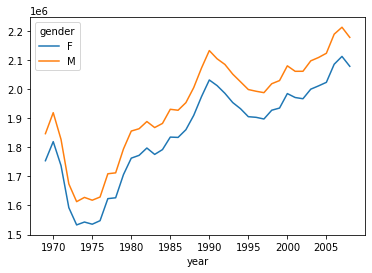

In [ ]:
births.pivot_table('births',index='year',columns='gender',aggfunc='sum').plot()